# mlbookcamp-code-02-regression-Homework

LOAD DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:])
  print(df[col].nunique())


longitude
[-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9  -120.91 -120.57 -120.43 -120.42 -120

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [8]:
df['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

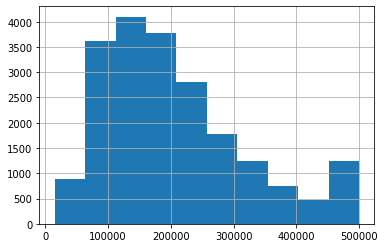

In [9]:
df['median_house_value'].hist()

In [10]:
df= df.drop("ocean_proximity", axis =1)

In [11]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [12]:
missing_value = df[df.isnull().any(axis=1)]

In [13]:
missing_value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0
...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0


In [14]:
print(df['population'].quantile(q=0.5))

1166.0


In [15]:
#split the data
np.random.seed(42)

n=len(df)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n-(n_val+n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train1 = df_shuffled.iloc[:n_train].copy()
df_val1 = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test1 = df_shuffled.iloc[n_train+n_val:].copy()


del df_train1['median_house_value']
del df_val1['median_house_value']
del df_test1['median_house_value']

In [16]:
y_train_orig = df_train.median_house_value.values
y_val_orig =df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [17]:
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [18]:
meantrain = df_train['total_bedrooms'].mean()
meanval = df_val['total_bedrooms'].mean()
meantest = df_test['total_bedrooms'].mean()

In [19]:
meantrain

533.4803317730147

In [20]:
meanval

543.6441375968992

In [21]:
meantest

545.047480620155

In [22]:
def train_linear_regression(X,y):
  ones= np.ones(X.shape[0])
  X = np.column_stack([ones,X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]
                

In [23]:
# logistic regression using missing values as zeros
df_train['total_bedrooms'] = df_train['total_bedrooms'].replace(np.nan, 0)
df_val['total_bedrooms'] = df_val['total_bedrooms'].replace(np.nan, 0)
df_test['total_bedrooms'] = df_test['total_bedrooms'].replace(np.nan, 0)

In [24]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812
3024,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313
15663,-122.44,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801
20484,-118.72,34.28,17.0,3051.0,0.0,1705.0,495.0,5.7376
9814,-121.93,36.62,34.0,2351.0,0.0,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
10292,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327
16722,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798
11730,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
5993,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566


In [25]:
 train_linear_regression(df_train, y_train)

(-11.686975242036546,
 array([-2.76255120e-01, -2.82087184e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [26]:
# logistic regression using mean values replacing nan

df_train1['total_bedrooms'].fillna(value=df_train['total_bedrooms'].mean(), inplace = True)


In [27]:
df_train1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,-119.01,36.06,25.0,1505.0,524.563146,1392.0,359.0,1.6812
3024,-119.46,35.14,30.0,2943.0,524.563146,1565.0,584.0,2.5313
15663,-122.44,37.80,52.0,3830.0,524.563146,1310.0,963.0,3.4801
20484,-118.72,34.28,17.0,3051.0,524.563146,1705.0,495.0,5.7376
9814,-121.93,36.62,34.0,2351.0,524.563146,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
10292,-117.81,33.88,19.0,2265.0,283.000000,904.0,279.0,9.2327
16722,-120.68,35.48,15.0,2608.0,525.000000,1351.0,502.0,2.7798
11730,-120.91,38.98,13.0,7689.0,1415.000000,3264.0,1198.0,3.6530
5993,-117.72,34.09,36.0,1473.0,328.000000,785.0,299.0,3.2566


In [28]:
 train_linear_regression(df_train1, y_train)

(-11.75931194951746,
 array([-2.76807271e-01, -2.82180945e-01,  2.93043296e-03, -1.48533026e-05,
         2.47914144e-04, -2.03763101e-04,  4.87150764e-04,  1.73085447e-01]))

In [29]:
# logistic regression using mean values replacing nan

df_val1['total_bedrooms'].fillna(value=df_val1['total_bedrooms'].mean(), inplace = True)

In [30]:
# validation with mean replacing Nan
w_0, w =train_linear_regression(df_val1, y_val)

In [31]:
w_0

-11.921458708155102

In [32]:
w

array([-2.77803590e-01, -2.82955852e-01,  3.82949787e-03, -4.11044539e-05,
        5.86610608e-04, -1.87359492e-04,  2.34267255e-04,  1.81648046e-01])

In [33]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812
3024,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313
15663,-122.44,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801
20484,-118.72,34.28,17.0,3051.0,0.0,1705.0,495.0,5.7376
9814,-121.93,36.62,34.0,2351.0,0.0,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
10292,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327
16722,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798
11730,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
5993,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566


In [34]:
y_pred = w_0+ df_val .dot(w)

In [44]:
y_pred

19660    11.427117
4415     12.084925
18113    12.657374
17673    12.105021
16992    12.644953
           ...    
20011    11.462130
12225    11.509373
1051     11.662858
14519    12.156162
11410    12.249788
Length: 4128, dtype: float64

In [35]:
def rmse (y_val, y_pred):
  error = y_pred-y_val
  mse = (error **2).mean()
  return np.sqrt(mse)

In [36]:
rmse1 = rmse (y_val, y_pred)

In [37]:
rmse1

0.32800729288516417

In [38]:
# validation with 0 replacing Nan
w_1, w1 = train_linear_regression(df_val, y_val)

In [45]:
w_1

-11.921458708155102

In [46]:
w1

array([-2.77803590e-01, -2.82955852e-01,  3.82949787e-03, -4.11044539e-05,
        5.86610608e-04, -1.87359492e-04,  2.34267255e-04,  1.81648046e-01])

In [39]:
y_pred1 = w_1+ df_val.dot(w1)

In [43]:
y_pred1

19660    11.427117
4415     12.084925
18113    12.657374
17673    12.105021
16992    12.644953
           ...    
20011    11.462130
12225    11.509373
1051     11.662858
14519    12.156162
11410    12.249788
Length: 4128, dtype: float64

In [40]:
def rmse (y_val, y_pred1):
  error = y_pred-y_val
  mse = (error **2).mean()
  return np.sqrt(mse)

In [41]:
rmse2 = rmse (y_val, y_pred1)

In [42]:
rmse2

0.32800729288516417

In [47]:
# Question 4 -Regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [53]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_train, y_train, r=r)

    y_pred =w_0 + df_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w_0, score)

0 -11.686975242036546 0.32953303652286225
1e-06 -11.686959175728921 0.32953303616512075
0.0001 -11.685368865034667 0.32953300097081173
0.001 -11.670931317799797 0.32953270386737127
0.01 -11.528493585632091 0.32953193659945135
0.1 -10.274500282195673 0.3296947205397184
1 -4.920480897742212 0.3337887220006135
5 -1.482095745621172 0.33924853455052
10 -0.7899311831779245 0.34060638078095284


In [58]:
# Question 5 - Using different values of seed for splitting the data

#split the data


score_list =[]
for i in [0,1,2,3,4,5,6,7,8,9]:

  np.random.seed(i)

  n=len(df)

  n_val = int(0.2*n)
  n_test = int(0.2*n)
  n_train = n-(n_val+n_test)

  idx = np.arange(n)
  np.random.shuffle(idx)

  df_shuffled = df.iloc[idx]

  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()

  df_train['total_bedrooms'] = df_train['total_bedrooms'].replace(np.nan, 0)
  df_val['total_bedrooms'] = df_val['total_bedrooms'].replace(np.nan, 0)
  df_test['total_bedrooms'] = df_test['total_bedrooms'].replace(np.nan, 0)

  y_train_orig = df_train.median_house_value.values
  y_val_orig =df_val.median_house_value.values
  y_test_orig = df_test.median_house_value.values

  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  w_0, w =train_linear_regression(df_val, y_val)


  y_pred = w_0+ df_val.dot(w)


  score = rmse(y_val, y_pred)
  score_list.append(score)


stddev = np.std(score_list)
print(round(stddev, 3))

0.004
